<a href="https://colab.research.google.com/github/Himmmmanshu/Oasis-Infobyte-Internship/blob/main/Unemployment_Rate_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unemployment Analysis Python**
**Oasis Infobyte Data Science Internship**
# Task 2

Importing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px

In [ ]:
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

Analysing the DataSet

In [ ]:
df.shape

(267, 9)

In [ ]:

df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
df[' Date'][0]

' 31-01-2020'

In [ ]:
df[' Date'] = pd.to_datetime(df[' Date'], dayfirst= True)

In [ ]:
df[' Date'][0]

Timestamp('2020-01-31 00:00:00')

In [ ]:

df[' Frequency'][0]

' M'

In [ ]:
df.value_counts(' Frequency')

 Frequency
 M    267
dtype: int64

In [ ]:
df.rename(columns = {'Region':'States', 'Region.1':'Region'}, inplace = True)

Visualizing the DataSet

In [ ]:
df.groupby('Region')['Region'].count()

Region
East         40
North        79
Northeast    38
South        60
West         50
Name: Region, dtype: int64

<Axes: >

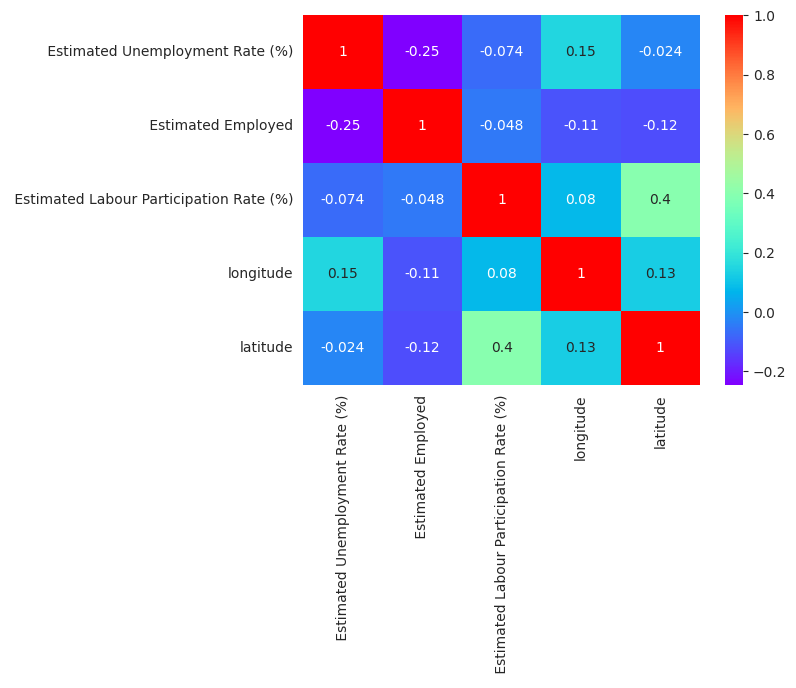

In [ ]:
heatmaps = df[[' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
        'longitude', 'latitude']]
heatmaps = heatmaps.corr()
sns.heatmap(heatmaps,annot=True,cmap = 'rainbow')

In [ ]:
fig = px.box(df,x= 'States',y= ' Estimated Unemployment Rate (%)',color='States',title = 'Unemployment Rate')
fig.show()

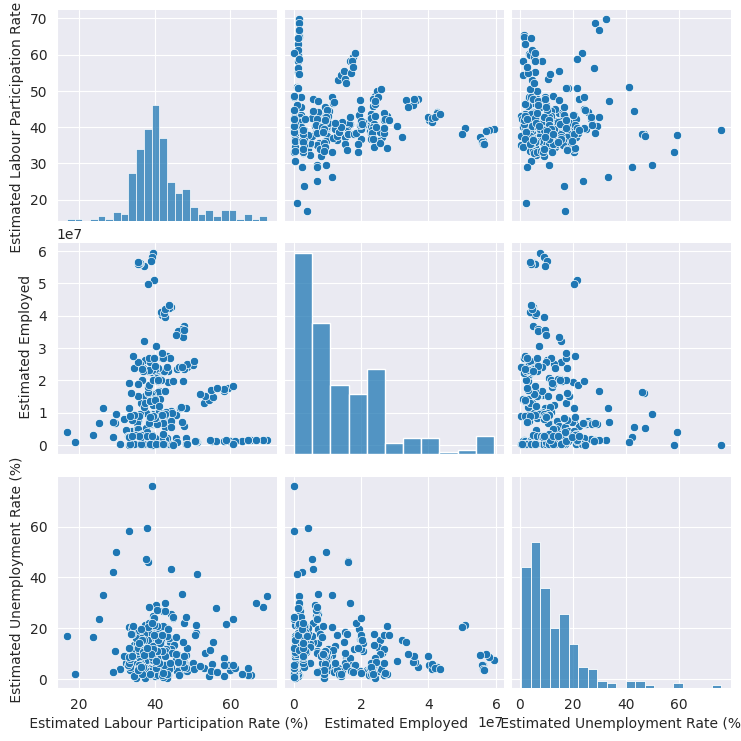

In [ ]:
sns.pairplot(df[[' Estimated Labour Participation Rate (%)',' Estimated Employed',' Estimated Unemployment Rate (%)']])

In [ ]:
unp = df.groupby('States').mean(' Estimated Unemployment Rate (%)')
unp.reset_index(level=0, inplace=True)

In [ ]:
fig = px.bar(unp.sort_values(' Estimated Unemployment Rate (%)'), x='States', y=' Estimated Unemployment Rate (%)', color='States',
             title='Average Unemployment Rate in each state', template='plotly')
fig.show()

In [ ]:
estemp = df[[' Estimated Employed','Region']]

In [ ]:
count_value = estemp.groupby('Region')[' Estimated Employed'].sum()

In [ ]:
count_value

Region
East          784094676
North        1032726546
Northeast     137450010
South         842435360
West          931175636
Name:  Estimated Employed, dtype: int64

Text(0.5, 1.0, 'Estimated Employed by Region')

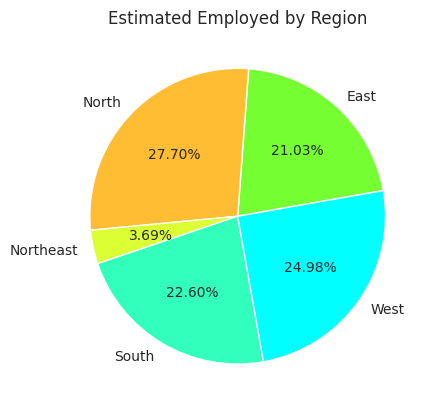

In [ ]:
plt.pie(count_value,labels=count_value.index,startangle=10
        ,autopct='%1.2f%%',colors=['#75FF33','#FFBD33','#DBFF33','#33FFBD','#00ffff'])
plt.title('Estimated Employed by Region')